In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

xlsx = pd.ExcelFile('Dados/PDFJaneiro.xlsx')
df = pd.read_excel(xlsx, 'Planilha1')
df = df.rename(columns={"Nr. Ordem" : "Nr. Ordem Abast.","Nr." : "Nr. Lcto Fitcard", "Exerc. Empenho" : "Exerc.", "Unnamed: 9" : "Empenho", "Exerc..1" : "Exerc.", "Tipo.1" : "Tipo Nota Fiscal", "Valor" : "Valor Abast."})
#Tirei o valor ajustado para testar a tabela que representa o mês de Janeiro e nela vários valores da coluna Valor Ajustado estão faltando
df = df.drop(["Lcto", "Exerc.", "Lançamento", "Nr. Ordem Abast.", "Nr. Lcto Fitcard", "Empenho", "Tipo Nota Fiscal", "Serie", "EQAL", "Liquidação", "Numero", "Valor Ajustado"], axis = 1)
df["Nr Litros"] = df["Nr Litros"] / 1000
#Renomeia os nomes dos produtos para facilitar o plot de gráficos
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/01/2019,79417,AJM-9211,Abast,GASOLINA,23.200,99.53
1,02/01/2019,79464,BCD-6525,Abast,ETANOL,41.441,115.62
2,02/01/2019,79466,BCD-6527,Abast,ETANOL,46.090,128.59
3,02/01/2019,79432,ARV-7425,Abast,ETANOL,45.168,126.02
4,02/01/2019,79473,AJU-6529,Abast,DIESEL,104.080,363.24
5,02/01/2019,79444,ATL-9834,Abast,ETANOL,47.560,132.69
6,02/01/2019,79468,BCD-6529,Abast,ETANOL,48.980,136.65
7,02/01/2019,79457,BCC-4713,Abast,ETANOL,50.179,140.00
8,02/01/2019,79462,BCD-6523,Abast,ETANOL,40.720,113.61
9,02/01/2019,79505,AHR-3194,Abast,GASOLINA,19.720,84.60


In [17]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

43.48261570247936

In [13]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
139,21/01/2019,87010,EQU-8710,Consum,GASOLINA,4.279,17.93
25,04/01/2019,93011,ATW-9412,Abast,GASOLINA,6.140,26.34
142,21/01/2019,93014,ATW-9372,Abast,GASOLINA,6.621,27.74
77,11/01/2019,79436,ASZ-6988,Abast,GASOLINA,7.360,30.84
121,17/01/2019,79437,ASZ-7083,Abast,GASOLINA,7.489,31.38
...,...,...,...,...,...,...,...
214,29/01/2019,78012,AKF-2842,Abast,ÓLEO DIESEL S-10,121.209,423.02
233,31/01/2019,78012,AKF-2842,Abast,ÓLEO DIESEL S-10,126.670,442.08
61,09/01/2019,79473,AJU-6529,Abast,ÓLEO DIESEL S-10,127.230,444.03
70,11/01/2019,78040,AEO-9326,Abast,ÓLEO DIESEL S-10,135.650,473.42


In [47]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
136,18/01/2019,79473,AJU-6529,Abast,ÓLEO DIESEL S-10,138.891,484.73
70,11/01/2019,78040,AEO-9326,Abast,ÓLEO DIESEL S-10,135.650,473.42
61,09/01/2019,79473,AJU-6529,Abast,ÓLEO DIESEL S-10,127.230,444.03
233,31/01/2019,78012,AKF-2842,Abast,ÓLEO DIESEL S-10,126.670,442.08
214,29/01/2019,78012,AKF-2842,Abast,ÓLEO DIESEL S-10,121.209,423.02
...,...,...,...,...,...,...,...
23,04/01/2019,79459,BCD-6855,Abast,ÓLEO DIESEL S-10,43.731,122.01
124,17/01/2019,79463,BCD-6524,Abast,ÓLEO DIESEL S-10,43.591,117.26
37,07/01/2019,79470,BCD-6851,Abast,GASOLINA,43.550,182.47
187,25/01/2019,79413,AHQ-1425,Abast,GASOLINA,43.511,182.31


In [24]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
120,17/01/2019,79421,AJN-3792,Abast,GASOLINA,58.360,244.53
204,28/01/2019,79445,ATL-9829,Abast,GASOLINA,53.539,224.33
17,03/01/2019,92046,ALE-6725,Abast,GASOLINA,52.520,225.31
203,28/01/2019,79444,ATL-9834,Abast,GASOLINA,51.530,215.91
49,08/01/2019,79463,BCD-6524,Abast,GASOLINA,50.310,210.80
56,09/01/2019,77097,AAW-2629,Abast,GASOLINA,50.120,210.00
178,24/01/2019,92046,ALE-6725,Abast,GASOLINA,49.561,207.66
31,07/01/2019,79461,BCD-6871,Abast,GASOLINA,49.380,206.90
93,15/01/2019,79457,BCC-4713,Abast,GASOLINA,48.279,202.29
30,07/01/2019,79452,BCC-4699,Abast,GASOLINA,48.230,202.08


In [52]:
df["Produto"].value_counts()

ETANOL      115
GASOLINA     84
DIESEL       43
Name: Produto, dtype: int64

In [53]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.475207
GASOLINA    0.347107
DIESEL      0.177686
Name: Produto, dtype: float64

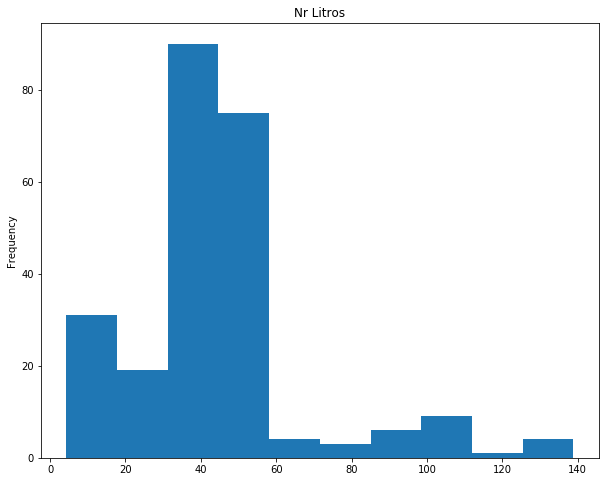

In [19]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

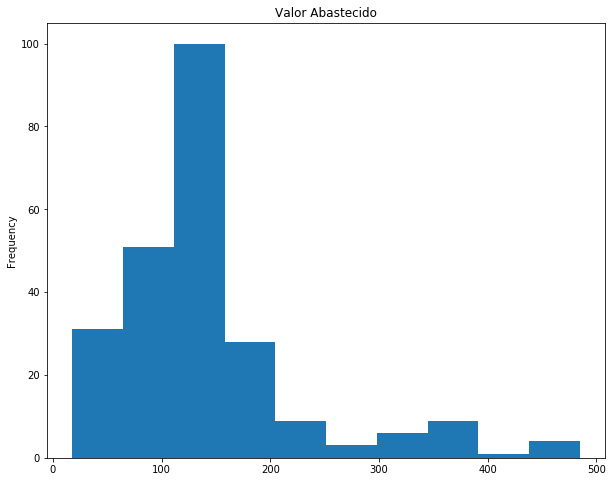

In [30]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [26]:
df["Nr Litros"].describe()

count    242.000000
mean      43.482616
std       23.896279
min        4.279000
25%       34.202500
50%       42.795500
75%       48.917750
max      138.891000
Name: Nr Litros, dtype: float64

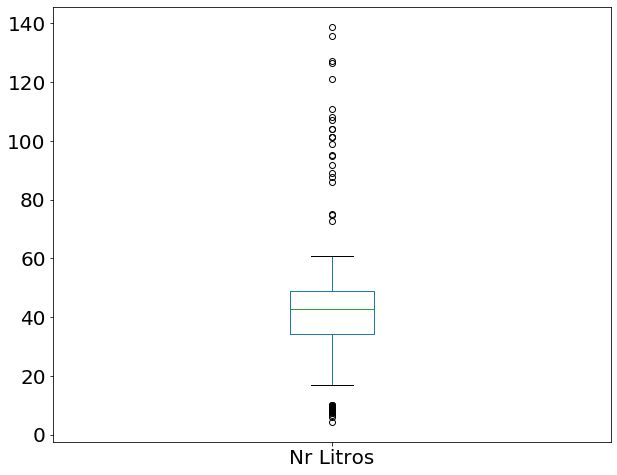

In [27]:
df["Nr Litros"].plot(kind="box")

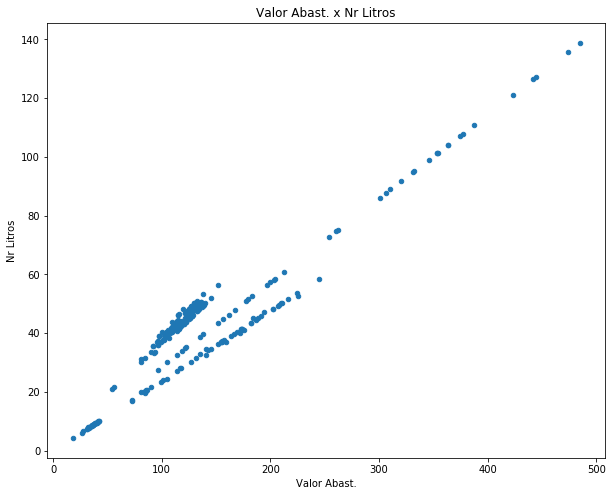

In [12]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

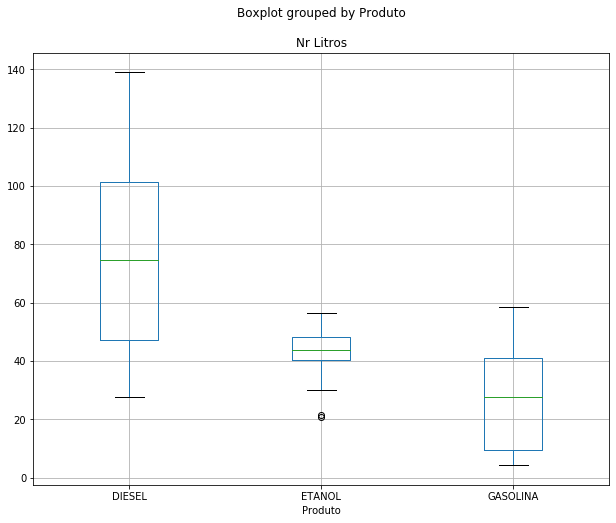

In [13]:
df.boxplot(column="Nr Litros", by="Produto")

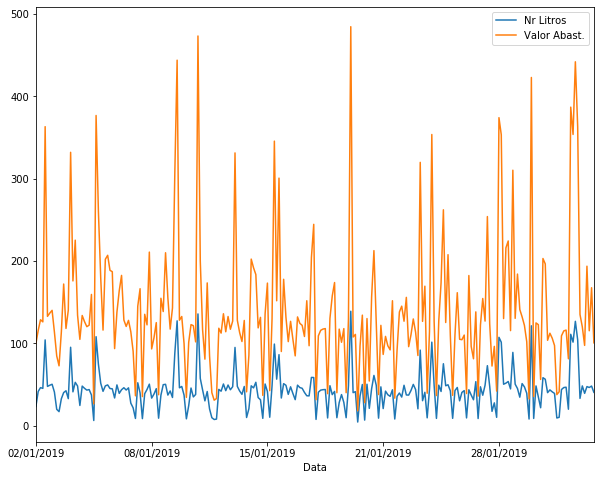

In [6]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

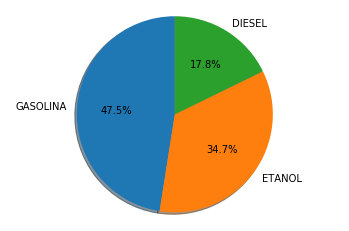

In [150]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

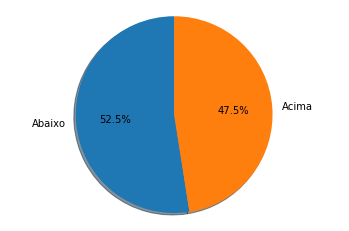

In [158]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

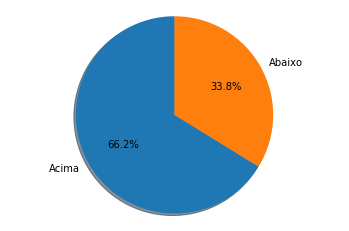

In [172]:
labels = ["Acima", "Abaixo"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

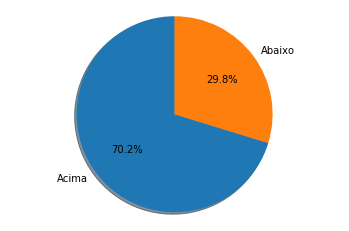

In [169]:
labels = ["Acima", "Abaixo"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

In [170]:
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
teste

0      False
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12      True
13     False
14     False
15      True
16      True
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24      True
25     False
26      True
27      True
28      True
29     False
30      True
31      True
32      True
33      True
34     False
35     False
36      True
37      True
38     False
39     False
40     False
41     False
42     False
43     False
44      True
45      True
46     False
47     False
48     False
49      True
50     False
51     False
52     False
53     False
54      True
55     False
56      True
57      True
58     False
59      True
60      True
61      True
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70      True
71      True
72     False
73     False
74      True
75     False
76     False